# Artificial Neural Networks AM41AN

## Week 9 Error Back-Propagation and regularization

## Task 1

Implement the Error Back-Propagation (EBP) algorithm to train the weights of a network with one hidden layer compossed by $K$ sigmoidal units.
The task is to approximate a function $f:\mathscr{X}\subset\mathbb{R}^2\to\mathbb{R}$



In [1]:
##############
### Task 1 ###
##############

import numpy as np                              # Imports the libraries
import matplotlib.pyplot as plt  
import random as rn
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import axes3d, Axes3D

def function3D(x,y):                            # Continuous function being approached
    return  np.sin(3*(x-y))+.5*np.cos(x+y)#-(x-1.5)**2 - (y-1.5)**2

def sig(x):                                     # Current sigmoidal function
    return  np.tanh(x) 

def vectors3D(a,b,c,d,M):                       # Function that computs the grid points and mid-grid points
    fi = np.zeros((M,M))                        # grid in f(x,y)
    ti = np.zeros(M)                            # mid-grid in x
    si = np.zeros(M)                            # mid-grid in y
    Dx = (b - a) / M                            # delta x
    Dy = (d - c) / M                            # delta y
    for i in range(M):                          # calculation of each point
        ti[i] = a + (i + 0.5) * Dx
        si[i] = c + (i + 0.5) * Dy
    for i in range(M):
        for j in range(M):
            fi[i,j] = function3D(ti[i],si[j])   # calculation of the function over the grid
    return(fi,ti,si)

def network(X,Y,W1,W2,q):                       # Computes the output of a network with one hidden layer. W1 connext the hidden units to
    s1 = np.shape(W1)                           # the inputs, Wz connects the outputs to the hidden units. Hidden units use sig 
    if s1[0] != 3:                              # Verifies that the weights are consistent with the dimension of the inputs and with
        print('error en w1')                    # themselves.
    s2 = len(W2)
    if s2 != s1[1] + 1:
        print('error en w2')
    z1 = np.zeros(s1[1] + 1)                    # hidden-units outputs
    for k in range(s1[1]):
        z1[k] = sig(q * (W1[0,k] * X + W1[1,k] * Y + W1[2,k]))
    z1[s1[1]] = 1
    return(np.dot(z1,W2))                       # computs the output and returns it
    
def ebp(a,b,c,d,M,Q,K,eta,MaxIt,Epochs,logic,Y1,Y2):  # Computes the ebp algorithm to train a network with K sigmoidal units in its hidden layer
                                                # the network implements a map from [a,b]x[c,d] to R. The total number of points in the grid
                                                # is M^2, Q is the parameter for the sigmoidal's argument, MaxInt and Epochs control the
                                                # number of iterations and if logic = 1 creates from random values the networks'weights, if
                                                # logic != 1 then the program uses values for w1 and w2 computed in previous runs.
    emin = 10 ** 30                             # Initial value of the loss
    ff , xx , yy = vectors3D(a,b,c,d,M)         # Parameters of the grid
    print('Finished vectors3D')
    if logic == 1:                              # Creates (or re-uses) the weights of the network
        w1 = np.random.normal(0, 0.1, size=(3,K))
        w2 = np.random.normal(0, 0.1, size=(K + 1))
    else:
        w1 = Y1
        w2 = Y2
    for k in range(K):                          # Normalizes the weights to vectors of length 1
        w1[:,k] = w1[:,k] / np.sqrt(np.dot(w1[:,k],w1[:,k]))
    w2 = w2 / np.sqrt(np.dot(w2,w2))     
    for ep in range(Epochs):                    # Outer loop in Epochs (sets the annealing to 1)
        for n in range(MaxIt):                  # Internal loop with annealing in the learning rate
            ii = rn.randint(0 , M - 1)          # Sellects a point of the grid at random
            jj = rn.randint(0 , M - 1)
            rl = np.array([xx[ii],yy[jj],1])
            fl = ff[ii,jj]
            a1 = np.zeros(K)
            z1 = np.zeros(K + 1)
            for k in range(K):                  # Computes the outputs of the hidden units for the sellected point in the grid
                a1[k] = np.dot(w1[:,k],rl)
                z1[k] = sig(Q * a1[k])
            z1[K] = 1
            z2 = np.dot(w2,z1)                  # Computes the network's output
            Dw1 = np.zeros((3,K))
            for k in range(K):                  # computes the deltas for the hidden layer
                Dw1[:,k] = (1 - z1[k] ** 2) * (z2 - fl) * w2[k] * rl
            for k in range(K):                  # implements the update of the weights w1 with annealed step
                w1[:,k] = w1[:,k] - (eta / np.sqrt(n + 1)) * Dw1[:,k]
            Dw2 = (z2 - fl) * z1                # computes the delta for the output
            w2 = w2 - (eta / np.sqrt(n + 1)) * Dw2 # implements the update of the weights w2 with annealed step
        error = 0                               # at the end of the internal loop computes the quadratic error over the grid
        for ii in range(M):
            for jj in range(M):
                zz = network(xx[ii],yy[jj],w1,w2,Q)
                error = error + (ff[ii,jj] - zz) ** 2
        error = error / (M * M)
        if error < emin:                        # if the error is less than the error in the previous epoch the weights are accepted
            emin = error
            V1 = w1
            V2 = w2
        else :                                  # if it isn't the weights are reset to the valius found in the previous epoch
            w1 = V1
            w2 = V2
#        print(ep,'   ',emin)
    return(w1,w2)                               # outputs the trained network's weights

def approx3D(a,b,c,d,L,Q,V1,V2):                # makes the 3D plot of the approximation
    ff , xx , yy = vectors3D(a,b,c,d,L)
    aa = np.zeros((L,L))
    for i in range(len(xx)):                                   # Calculation
        for j in range(len(yy)):
            aa[i,j] = network(xx[i],yy[j],V1,V2,Q)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})    # 3D Plots
    xx , yy = np.meshgrid(xx,yy)
    surf = ax.plot_surface(xx, yy, aa, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()  

def figura3D(a,b,c,d,L,Q):                       # makes the 3D plot of the function
    ff , xx , yy = vectors3D(a,b,c,d,L)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})    # 3D Plots
    xx , yy = np.meshgrid(xx,yy)
    surf = ax.plot_surface(xx, yy, ff, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()      

## Task 2

Implement a regularization through weight decay, considering a regularization term of the form $\Omega(\boldsymbol{w})=\frac{\nu}{2}\langle\boldsymbol{w}|\boldsymbol{w}\rangle$, for a suitable value of $\nu>0$.

In [2]:
##############
### Task 2 ###
##############

import math
from numpy.linalg import eig
    
def reg(a,b,c,d,M,Q,K,w1,w2):                                                                        
    ff , xx , yy = vectors3D(a,b,c,d,M)        
    print('Finished vectors3D')
#    w1 = WW1
#    w2 = WW2
    d1 = np.size(w1)
    d2 = np.size(w2)
    dh = d1 + d2
    HH = np.zeros((dh,dh))
#    for k in range(K):                          
#        w1[:,k] = w1[:,k] / np.sqrt(np.dot(w1[:,k],w1[:,k]))
#    w2 = w2 / np.sqrt(np.dot(w2,w2))     
    for ii in range(M):                    
        for jj in range(M):                 
            rl = np.array([xx[ii],yy[jj],1])
            fl = ff[ii,jj]
            a1 = np.zeros(K)
            z1 = np.zeros(K + 1)
            for k in range(K):                  
                a1[k] = np.dot(w1[:,k],rl)
                z1[k] = sig(Q * a1[k])
            z1[K] = 1
            z2 = np.dot(w2,z1)
            
            for ih in range(dh):
                if ih < d2 :
                    HH[ih,ih] = HH[ih,ih] + z1[ih] ** 2
                else:
                    k1 = (ih - 1) % K
                    i1 = math.floor((ih - 1) / K) - 1
                    HH[ih,ih] = HH[ih,ih] + (w2[k1] * (1 - z1[k1] ** 2) - 2 * (z2 - fl) * z1[k1]) * w2[k] * (1 - z1[k1] ** 2) * rl[i1] ** 2 
                for jh in range(ih):
                    if ih < d2 :
                        HH[ih,jh] = HH[ih,jh] + z1[ih] * z1[jh]
                    else:
                        k1 = (ih - 1) % K
                        i1 = math.floor((ih - 1) / K) - 1
                        if jh < d2 :
                            if jh == i1 :
                                tt = z2 - fl
                            else:
                                tt = 0
                            HH[ih,jh] = HH[ih,jh] + (w2[k1] * z1[jh] + tt) * (1 - z1[k1] ** 2) * rl[i1]
                        else:
                            k2 = (jh - 1) % K
                            i2 = math.floor((jh - 1) / K) - 1
                            HH[ih,jh] = HH[ih,jh] + (w2[k1] * (1 - z1[k1] ** 2) * rl[i1]) * (w2[k2] * (1 - z1[k2] ** 2) * rl[i2])
            
    HH = HH / M ** 2
    for ih in range(dh):
        for jh in range(ih):
            HH[jh,ih] = HH[ih,jh]
    hv , hV = eig(HH)
    return(hv,hV,HH)                               # outputs the trained network's weights


## Task 3

Regularize the weight vectors and compute the function produced by the regularized network. Also compute the errors for the unregularized and regularized networks.

In [3]:
################
### Task 3 a ###
################

def reg1(nu,w1,w2,val,vec):                                                                        
#    w1 = WW1
#    w2 = WW2
    d1 = np.size(w1)
    d2 = np.size(w2)
    dh = d1 + d2
    vv = np.zeros(dh)
    iv = 0
    for i in range(d2):
        vv[iv] = w2[i]
        iv = iv + 1
    for k in range(np.shape(w1)[1]):
        for i in range(np.shape(w1)[0]):
            vv[iv] = w1[i,k]
            iv = iv + 1
    vr = np.zeros(dh)
    for j in range(dh):
        for k in range(dh):
            ck = val[k] / (val[k] + nu)
            pr = 0
            for i in range(dh):
                pr = pr + vv[i] * vec[i][k]
            vr[j] = vr[j] + ck * pr * vec[j][k]
    v1 = np.zeros(np.shape(w1))
    v2 = np.zeros(np.shape(w2))
    iv = 0
    for i in range(d2):
        v2[i] = vr[iv]
        iv = iv + 1
    for k in range(np.shape(w1)[1]):
        for i in range(np.shape(w1)[0]):
            v1[i,k] = vr[iv]
            iv = iv + 1
    return(v1,v2)                               # outputs the trained network's weights

################
### Task 3 b ###
################

def errors(nu,w1,w2,val,vec):
#    w1 = WW1
#    w2 = WW2
    d1 = np.size(w1)
    d2 = np.size(w2)
    dh = d1 + d2
    ww = np.zeros(dh)
    iv = 0
    for i in range(d2):
        ww[iv] = w2[i]
        iv = iv + 1
    for k in range(np.shape(w1)[1]):
        for i in range(np.shape(w1)[0]):
            ww[iv] = w1[i,k]
            iv = iv + 1
    ev = 0
    ew = 0
    for k in range(dh):
        ck = 1 / (1 + nu / val[k])
        pr = 0
        for i in range(dh):
            pr = pr + ww[i] * vec[i][k]
        pr = 0.5 * val[k] * pr ** 2
        ew = ew - pr
        ev = ev - ck * pr
    return(ew,ev)                               # outputs the errors
    


In [4]:
####################
### All complete ###
####################

def complete(a,b,c,d,M,Q,K,eta,MaxIt,Epochs,logic,L,nu,Y1,Y2):
    WW1 , WW2 = ebp(a,b,c,d,M,Q,K,eta,MaxIt,Epochs,logic,Y1,Y2)
    figura3D(a,b,c,d,L,Q)
    approx3D(a,b,c,d,L,Q,WW1,WW2)
    eigenval,eigenvec,A = reg(a,b,c,d,M,Q,K,WW1,WW2)
    VV1 , VV2 = reg1(nu,WW1,WW2,eigenval,eigenvec)
    approx3D(a,b,c,d,L,Q,VV1,VV2)
    E0 , Er = errors(nu,WW1,WW2,eigenval,eigenvec)
    print(E0)
    print(Er)
    return(WW1,WW2)

Finished vectors3D


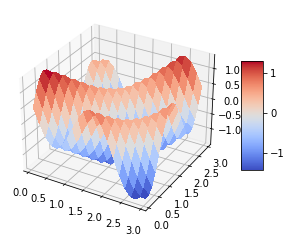

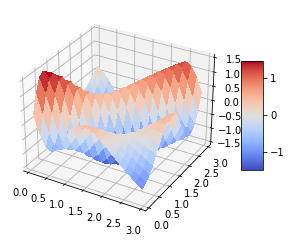

Finished vectors3D


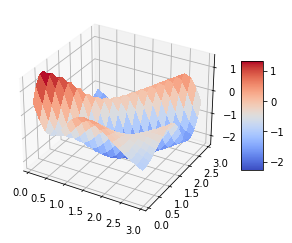

12.617843377355333
12.621629164332642


In [6]:
Y1 = 0
Y2 = 0
Y1 , Y2 = complete(0,3,0,3,10,1,10,.1,100,300,1,20,0.0001,Y1,Y2)



Finished vectors3D


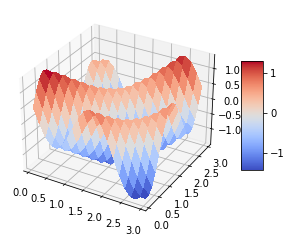

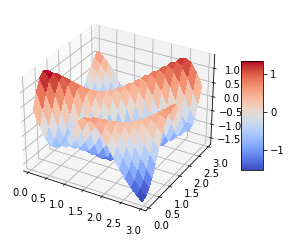

Finished vectors3D


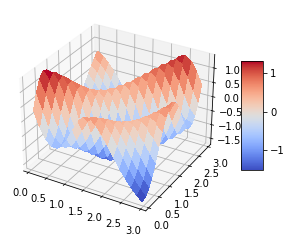

7.195640293048908
7.200097257290162


In [7]:
Y1 , Y2 = complete(0,3,0,3,10,1,10,.1,100,300,0,20,0.0001,Y1,Y2)